In [ ]:
# Card Dekho - Car Price Prediction 
# Importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, classification_report, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
df = pd.read_csv('../Dataset/CAR DEKHO.csv', encoding= 'ISO-8859-1')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [21]:
# Preprocessing
df['is_expensive'] = (df['selling_price']>=300000).astype(int)
df = df.drop(columns=['name','selling_price'])
df_encoded = pd.get_dummies(df,drop_first=True)

In [22]:
# Features & target
X = df_encoded.drop(columns=['is_expensive'])
y = df_encoded['is_expensive']

In [23]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train Decision Tree Model
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)
tree_preds = tree_clf.predict(X_test)

# Train logisitic Regression Model
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

In [25]:
# Metrics
tree_acc = accuracy_score(y_test, tree_preds)
tree_cm = confusion_matrix(y_test, tree_preds)

log_acc = accuracy_score(y_test, logreg_preds)
log_cm = confusion_matrix(y_test, logreg_preds)

In [26]:
print("Decision Tree")
print(f"accuracy score: {tree_acc}")
print(f'confusion matrix:{tree_cm}')
print("classification report:")
print(classification_report(y_test, tree_preds))

print("Logistic Regression")
print(f'accuracy score:{log_acc:.2f}')
print(f'confusion matrix:{log_cm}')
print("classification report:")
print(classification_report(y_test, logreg_preds))

Decision Tree
accuracy score: 0.8306451612903226
confusion matrix:[[293  57]
 [ 90 428]]
classification report:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       350
           1       0.88      0.83      0.85       518

    accuracy                           0.83       868
   macro avg       0.82      0.83      0.83       868
weighted avg       0.84      0.83      0.83       868

Logistic Regression
accuracy score:0.76
confusion matrix:[[215 135]
 [ 75 443]]
classification report:
              precision    recall  f1-score   support

           0       0.74      0.61      0.67       350
           1       0.77      0.86      0.81       518

    accuracy                           0.76       868
   macro avg       0.75      0.73      0.74       868
weighted avg       0.76      0.76      0.75       868



Text(408.9040404040403, 0.5, 'Actual')

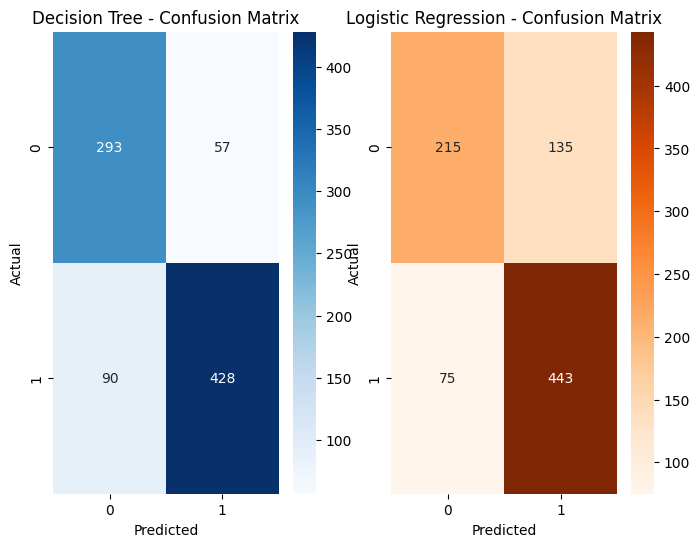

In [27]:
# Plotting
tree_cm = confusion_matrix(y_test, tree_preds)
tree_probs = tree_clf.predict_proba(X_test)[:,1]

log_cm = confusion_matrix(y_test,logreg_preds)
log_probs = logreg.predict_proba(X_test)[:,1]

fig,axes = plt.subplots(1,2,figsize=(8,6))

# Decision Tree Confusion Matrix
sns.heatmap(tree_cm, annot= True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Decision Tree - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Logisitic Regression Confusion Matrix
sns.heatmap(log_cm, annot= True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Logistic Regression - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

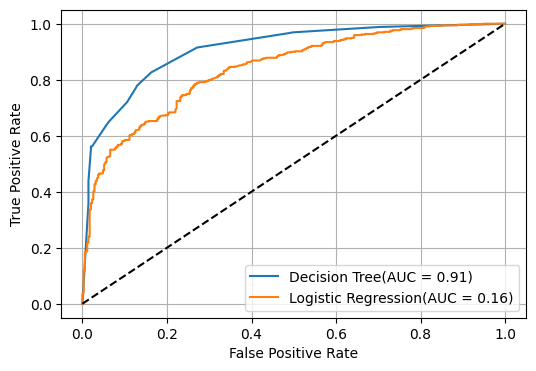

In [28]:
# ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_probs)
fpr_log, tpr_log, _ = roc_curve(y_test, log_probs)
auc_tree = auc(fpr_tree, tpr_tree)
auc_log = auc(tpr_log, fpr_log)


# Plot ROC Curves
plt.figure(figsize=(6,4))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree(AUC = {auc_tree:.2f})")
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression(AUC = {auc_log:.2f})")
plt.plot([0,1],[0,1],'k--') # Random Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()